In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [15]:
class multi_armed_bandit:
    def __init__(self, k):
        self.k = k
        self.actions = np.full(self.k, 0)
        self.qn = np.zeros(self.k)
        
    def random_walks(self):
        self.qn += np.random.normal(0,0.01,k)
        
    def predicted_rewards(self, q_true, i, alpha):
        self.qn = self.qn + alpha*(q_true[i] - self.qn[i])

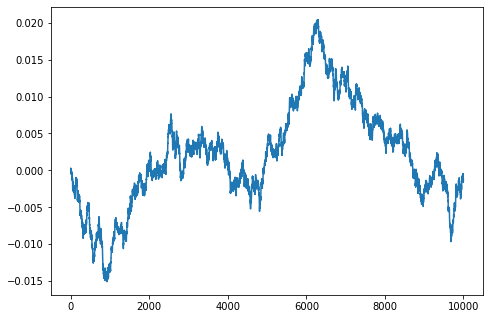

In [16]:
all_rewards, all_optimal_actions = [], []

for _ in range(2000):
    testbed = multi_armed_bandit(10)
    q_true = np.zeros(testbed.k)
    
    r = []
    op = []
    
    for i in range(10001):
        a = 1/(i+1)
        alpha = 0.1
        epsilon = 0
        
        action_taken = np.random.randint(testbed.k) if(random.random() < epsilon) else np.argmax(testbed.qn)
        reward = q_true[action_taken]
        
        r.append(reward)
        op.append(np.argmax(testbed.qn))
        
        testbed.predicted_rewards(q_true, action_taken, a)
        q_true += np.random.normal(0,0.01,testbed.k)
        optimal_action = np.argmax(testbed.qn)
    
    all_rewards.append(r)
    all_optimal_actions.append(op)

avg_reward = np.mean(all_rewards, 0)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(range(0,10001,1), avg_reward)

# print(avg_reward)